In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-07-21 08:06:17.515703: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-21 08:06:17.834671: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-21 08:06:18.561344: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
#Coletando dados

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/RJ_Reconstrucao_Crustaceos_2024_06_25.xlsx')

df_Camaroes = df[['Ano','Cam_sete_barbas_art', 'Cam_branco_art', 'Cam_rosa_art', 'Cam_barba_ruca_art','Cam_santana_art']].dropna().reset_index(drop=True)


dados = df_Camaroes[['Ano','Cam_sete_barbas_art']]
for i in range(len(dados['Ano'])):
  dados.loc[i,'Soma'] = df_Camaroes.loc[i,'Cam_sete_barbas_art']+df_Camaroes.loc[i,'Cam_branco_art']+df_Camaroes.loc[i,'Cam_rosa_art']+df_Camaroes.loc[i, 'Cam_barba_ruca_art']+df_Camaroes.loc[i,'Cam_santana_art']
  
dados = dados[['Ano','Cam_sete_barbas_art','Soma']]

#Fazendo as proporções
for i in range(len(dados['Ano'])):
  dados.loc[i,'Prop_Cam_sete_barbas_art'] = dados.loc[i,'Cam_sete_barbas_art'] / dados.loc[i,'Soma']


anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

prop = dados['Prop_Cam_sete_barbas_art'].values
dados.head()

/tmp/ipykernel_5253/2280137198.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados.loc[i,'Soma'] = df_Camaroes.loc[i,'Cam_sete_barbas_art']+df_Camaroes.loc[i,'Cam_branco_art']+df_Camaroes.loc[i,'Cam_rosa_art']+df_Camaroes.loc[i, 'Cam_barba_ruca_art']+df_Camaroes.loc[i,'Cam_santana_art']


,Ano,Cam_sete_barbas_art,Soma,Prop_Cam_sete_barbas_art
0,1989,1072.0,6111.0,0.175421
1,1996,659.5,975.5,0.676064
2,1997,716.5,1508.5,0.474975
3,1998,1038.0,1543.5,0.672498
4,1999,477.5,944.5,0.505558


In [5]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

prop_mean = np.mean(prop)
prop_std = np.std(prop)
prop_norm = (prop - prop_mean)/prop_std

In [7]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,prop_norm, epochs=200, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_sete_barbas/pesos prop art 1989-2022/.weights.h5', overwrite=True)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 963ms/step - loss: 0.9992
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9896
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9829
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9750
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9674
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9589
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9493
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9393
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9273
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9149
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9041
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8932
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8837
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8748
Epoch 15/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8659
Epoch 16/200
1/1 ━

In [9]:
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_sete_barbas/pesos prop art 1989-2022/.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Previsões dos dados ausentes: [[0.15927863]
 [0.24535076]
 [0.3327765 ]
 [0.42588   ]
 [0.5152672 ]
 [0.59632134]
 [0.65004265]
 [0.6387866 ]
 [0.59752214]
 [0.55820507]
 [0.5070051 ]
 [0.45520577]
 [0.40660125]
 [0.42473042]
 [0.48036343]
 [0.51190376]
 [0.5218097 ]
 [0.51016325]
 [0.43797833]
 [0.41286454]
 [0.00353727]
 [0.        ]
 [0.05412191]
 [0.1349918 ]
 [0.21862616]
 [0.27769506]
 [0.29671633]
 [0.42730278]
 [0.5646303 ]
 [0.5996256 ]
 [0.6346022 ]
 [0.66924   ]
 [0.70331806]
 [0.737396  ]]


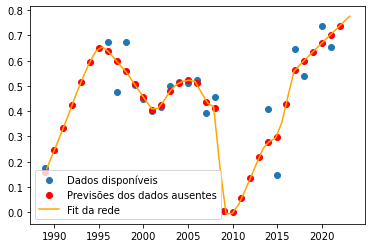

In [10]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*prop_std + prop_mean
prev_ausentes = model.predict(anos_para_prever_norm)*prop_std + prop_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0
    if prev_ausentes[i]>=1:
        prev_ausentes[i]=1

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,prop,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*prop_std + prop_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

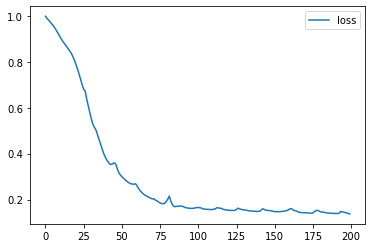

In [11]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [24]:
#Lista de anos sem buracos normalizada e sua predição      (para poder me referir por indices)

anos = np.arange(1950,np.max(anos_para_prever)+1)
anos_norm = (anos-ano_mean)/ano_std
prev_continua = model.predict(anos_norm)*prop_std + prop_mean

for i in range(len(prev_continua)):
    if prev_continua[i]<0:
        prev_continua[i]=0
    if prev_continua[i]>=1:
        prev_continua[i]=1

#Trazendo valores previstos para Camarao_art
df_prev_Camarao_art = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Camarao misturado/Previsão Camarao_art_1962-1974.xlsx')

for i in range(len(df_prev_Camarao_art['Ano'])):
    if pd.isnull(df.loc[i,'Camarao_art'])==True:
       df.loc[i,'Camarao_art'] = df_prev_Camarao_art.loc[i,'Camarao_art']


df_preenchido = df[['Ano','Cam_sete_barbas_art']].replace(np.nan,0)
for i in range(len(prev_continua)):
      df_preenchido.loc[i,'Cam_sete_barbas_art']=df_preenchido.loc[i,'Cam_sete_barbas_art']+df.loc[i,'Camarao_art']*prev_continua[i]
      df_preenchido.loc[i,'Valor acrescido']=df.loc[i,'Camarao_art']*prev_continua[i]
      

with pd.option_context('display.max_rows', None,):
    print(df_preenchido)


#Planilha com os dados preenchidos
df_preenchido.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_sete_barbas/Previsão Camarao_sete_barbas_art_1989-2022.xlsx')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
     Ano  Cam_sete_barbas_art  Valor acrescido
0   1950             0.000000         0.000000
1   1951             0.000000         0.000000
2   1952             0.000000         0.000000
3   1953             0.000000         0.000000
4   1954             0.000000         0.000000
5   1955             0.000000         0.000000
6   1956             0.000000         0.000000
7   1957             0.000000         0.000000
8   1958             0.000000         0.000000
9   1959             0.000000         0.000000
10  1960             0.000000         0.000000
11  1961             0.000000         0.000000
12  1962             0.000000         0.000000
13  1963             0.000000         0.000000
14  1964             0.000000         0.000000
15  1965             0.000000         0.000000
16  1966             0.000000         0.000000
17  1967             0.000000         0.000000
18  1968             0.000000         0.000000
19  1969             0

In [15]:
#Planilha com Camarao_art decrescido do que ja foi usado de 1989 ate 2022
Cam_art_sem_sb_89_22 = df[['Ano','Camarao_art']].replace(np.nan,0)
for i in range(len(prev_continua)):
    Cam_art_sem_sb_89_22.loc[i,'Camarao_art']-=Cam_art_sem_sb_89_22.loc[i,'Camarao_art']*prev_continua[i]


with pd.option_context('display.max_rows', None,):
  print(Cam_art_sem_sb_89_22)

Cam_art_sem_sb_89_22.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_sete_barbas/Cam_art_sem_sb_89-22.xlsx')

     Ano   Camarao_art
0   1950   1597.115234
1   1951   1517.034424
2   1952   1435.554077
3   1953   1287.010010
4   1954   1159.637939
5   1955   1402.511719
6   1956   1040.922485
7   1957    781.917480
8   1958   1015.011108
9   1959   1615.329224
10  1960    979.605896
11  1961    739.330261
12  1962   1549.439941
13  1963   1568.075073
14  1964   1865.081177
15  1965   2090.936279
16  1966   2129.691406
17  1967   3208.268799
18  1968   5343.994141
19  1969   3368.691650
20  1970   5020.974121
21  1971   4249.449707
22  1972   5174.506348
23  1973   7983.619141
24  1974   1896.200806
25  1975   6325.866699
26  1976   2446.894531
27  1977   5690.407715
28  1978  22588.000000
29  1979   2625.000000
30  1980   1116.000000
31  1981    651.000000
32  1982    722.000000
33  1983    756.000000
34  1984    547.000000
35  1985   1092.000000
36  1986   1248.000000
37  1987   1210.000000
38  1988    779.251526
39  1989    785.233765
40  1990      0.000000
41  1991      0.000000
42  1992   

In [23]:
#Fazendo uma planilha com Camarao_art decrescido do que ja foi retirado em todos os anos
Cam_art_sem_sb_50_88=pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_sete_barbas/Cam_art_sem_sb_50-88.xlsx')

Cam_art_sem_sb = df[['Ano','Camarao_art']].replace(np.nan,0)
for i in range(len(Cam_art_sem_sb['Ano'])):
    if i+1950 in Cam_art_sem_sb_50_88['Ano'].values:
        Cam_art_sem_sb.loc[i,'Camarao_art'] = Cam_art_sem_sb_50_88.loc[i,'Camarao_art'] 
    else:
        Cam_art_sem_sb.loc[i,'Camarao_art'] = Cam_art_sem_sb_89_22.loc[i,'Camarao_art'] 

with pd.option_context('display.max_rows', None,):
  print(Cam_art_sem_sb)

Cam_art_sem_sb.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_sete_barbas/Cam_art_sem_sb.xlsx')


     Ano  Camarao_art
0   1950     0.000000
1   1951     0.000000
2   1952     0.000000
3   1953     0.000000
4   1954     0.000000
5   1955     0.000000
6   1956     0.000000
7   1957     0.000000
8   1958     0.000000
9   1959     0.000000
10  1960     0.000000
11  1961     0.000000
12  1962     0.000000
13  1963     0.000000
14  1964     0.000000
15  1965     0.000000
16  1966     0.000000
17  1967     0.000000
18  1968     0.000000
19  1969     0.000000
20  1970     0.000000
21  1971     0.000000
22  1972     0.000000
23  1973     0.000000
24  1974     0.000000
25  1975   185.839844
26  1976   189.112061
27  1977   718.727539
28  1978  4002.667969
29  1979   607.410278
30  1980   329.762878
31  1981   241.656494
32  1982   337.715881
33  1983   468.139648
34  1984   409.982819
35  1985   842.420410
36  1986   966.255371
37  1987   941.619385
38  1988   662.978333
39  1989   785.233765
40  1990     0.000000
41  1991     0.000000
42  1992     0.000000
43  1993     0.000000
44  1994  